In [27]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")
from utils import eval_utils

In [44]:
def load_aurocs(dir, num_eval_times=10, num_forecast=50):
    all_aurocs = []
    for t in range(num_eval_times):
        curr_forecast_path = os.path.join(dir, f"#eval={num_eval_times}_#forecast={num_forecast}", f"time={t}.npy")
        assert os.path.isfile(curr_forecast_path), curr_forecast_path
        curr_aurocs = np.load(curr_forecast_path)
        all_aurocs.append(curr_aurocs)
    return np.array(all_aurocs)

In [61]:
model_str = "/home/chenwt/dynamic-graph-control/checkpoints/#nodes=30/latDim=2_edgeThresh=0.6/initProp=0.1_infThresh=0.3_maxDays=10_infParam=[1.0, 1.0]_susParam=[1.0, 1.0]_recParam=[1.0, 1.0]_intParam=[1.0, 1.0]/InterveneRate=0.1/#train=100_#val=100_#test=100/seed=0/Forecast/model=SAGELSTM/#epochs=1000_batch=32_lr=0.001_l2=0.0005_patience=100_delta=0.0001"
assert os.path.isdir(model_str)

no_shift_dir = f"{model_str}/initProp=0.1_infThresh=0.3_maxDays=10_infParam=[1.0, 1.0]_susParam=[1.0, 1.0]_recParam=[1.0, 1.0]_intParam=[1.0, 1.0]"
assert os.path.isdir(no_shift_dir)
inf_small_shift_dir = f"{model_str}/initProp=0.1_infThresh=0.25_maxDays=10_infParam=[1.0, 1.0]_susParam=[1.0, 1.0]_recParam=[1.0, 1.0]_intParam=[1.0, 1.0]"
assert os.path.isdir(inf_small_shift_dir)
inf_medium_shift_dir = f"{model_str}/initProp=0.1_infThresh=0.2_maxDays=10_infParam=[1.0, 1.0]_susParam=[1.0, 1.0]_recParam=[1.0, 1.0]_intParam=[1.0, 1.0]"
assert os.path.isdir(inf_small_shift_dir)
inf_large_shift_dir = f"{model_str}/initProp=0.1_infThresh=0.15_maxDays=10_infParam=[1.0, 1.0]_susParam=[1.0, 1.0]_recParam=[1.0, 1.0]_intParam=[1.0, 1.0]"
assert os.path.isdir(inf_large_shift_dir)
max_days_small_shift_dir = f"{model_str}/initProp=0.1_infThresh=0.3_maxDays=11_infParam=[1.0, 1.0]_susParam=[1.0, 1.0]_recParam=[1.0, 1.0]_intParam=[1.0, 1.0]"
assert os.path.isdir(max_days_small_shift_dir)
max_days_medium_shift_dir = f"{model_str}/initProp=0.1_infThresh=0.3_maxDays=13_infParam=[1.0, 1.0]_susParam=[1.0, 1.0]_recParam=[1.0, 1.0]_intParam=[1.0, 1.0]"
assert os.path.isdir(max_days_medium_shift_dir)
max_days_large_shift_dir = f"{model_str}/initProp=0.1_infThresh=0.3_maxDays=15_infParam=[1.0, 1.0]_susParam=[1.0, 1.0]_recParam=[1.0, 1.0]_intParam=[1.0, 1.0]"
assert os.path.isdir(max_days_large_shift_dir)
# assert all(os.path.isdir(d) for d in [no_shift_dir, inf_thresh_shift1_dir, inf_thresh_shift2_dir, max_days_shift1_dir, max_days_shift2_dir])
no_shift_aurocs = load_aurocs(no_shift_dir)
inf_small_shift_aurocs = load_aurocs(inf_small_shift_dir)
inf_medium_shift_aurocs = load_aurocs(inf_medium_shift_dir)
inf_large_shift_aurocs = load_aurocs(inf_large_shift_dir)
max_days_small_shift_aurocs = load_aurocs(max_days_small_shift_dir)
max_days_medium_shift_aurocs = load_aurocs(max_days_medium_shift_dir)
max_days_large_shift_aurocs = load_aurocs(max_days_large_shift_dir)

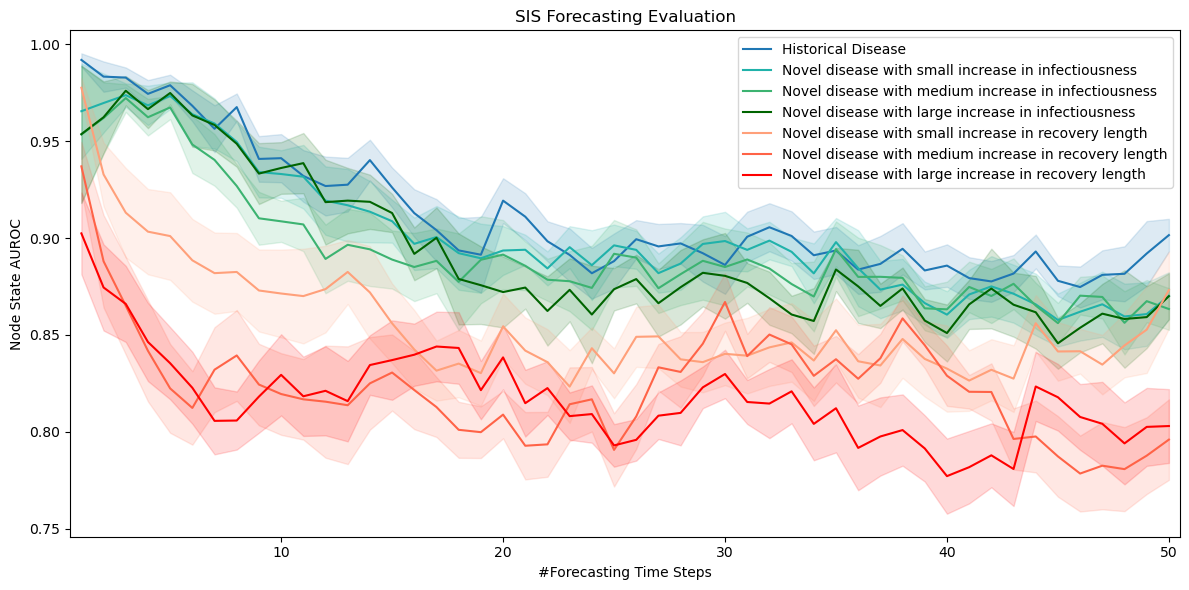

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(np.arange(50)+1, no_shift_aurocs.mean(axis=0), color="tab:blue", label="Historical Disease")
auroc_lower, auroc_higher = eval_utils.confidence_interval(no_shift_aurocs)
ax.fill_between(x=np.arange(no_shift_aurocs.shape[1])+1, y1=auroc_lower, y2=auroc_higher, color="tab:blue", alpha=0.15)

ax.plot(np.arange(50)+1, inf_small_shift_aurocs.mean(axis=0), color="lightseagreen", label="Novel disease with small increase in infectiousness")
auroc_lower, auroc_higher = eval_utils.confidence_interval(inf_small_shift_aurocs)
ax.fill_between(x=np.arange(inf_small_shift_aurocs.shape[1])+1, y1=auroc_lower, y2=auroc_higher, color="lightseagreen", alpha=0.15)

ax.plot(np.arange(50)+1, inf_medium_shift_aurocs.mean(axis=0), color="mediumseagreen", label="Novel disease with medium increase in infectiousness")
auroc_lower, auroc_higher = eval_utils.confidence_interval(inf_medium_shift_aurocs)
ax.fill_between(x=np.arange(inf_medium_shift_aurocs.shape[1])+1, y1=auroc_lower, y2=auroc_higher, color="mediumseagreen", alpha=0.15)

ax.plot(np.arange(50)+1, inf_large_shift_aurocs.mean(axis=0), color="darkgreen", label="Novel disease with large increase in infectiousness")
auroc_lower, auroc_higher = eval_utils.confidence_interval(inf_large_shift_aurocs)
ax.fill_between(x=np.arange(inf_large_shift_aurocs.shape[1])+1, y1=auroc_lower, y2=auroc_higher, color="darkgreen", alpha=0.15)

ax.plot(np.arange(50)+1, max_days_small_shift_aurocs.mean(axis=0), color="lightsalmon", label="Novel disease with small increase in recovery length")
auroc_lower, auroc_higher = eval_utils.confidence_interval(max_days_small_shift_aurocs)
ax.fill_between(x=np.arange(max_days_small_shift_aurocs.shape[1])+1, y1=auroc_lower, y2=auroc_higher, color="lightsalmon", alpha=0.15)

ax.plot(np.arange(50)+1, max_days_medium_shift_aurocs.mean(axis=0), color="tomato", label="Novel disease with medium increase in recovery length")
auroc_lower, auroc_higher = eval_utils.confidence_interval(max_days_medium_shift_aurocs)
ax.fill_between(x=np.arange(max_days_medium_shift_aurocs.shape[1])+1, y1=auroc_lower, y2=auroc_higher, color="tomato", alpha=0.15)

ax.plot(np.arange(50)+1, max_days_large_shift_aurocs.mean(axis=0), color="red", label="Novel disease with large increase in recovery length")
auroc_lower, auroc_higher = eval_utils.confidence_interval(max_days_large_shift_aurocs)
ax.fill_between(x=np.arange(max_days_large_shift_aurocs.shape[1])+1, y1=auroc_lower, y2=auroc_higher, color="red", alpha=0.15)

ax.legend()
ax.set_xlim(0.5, no_shift_aurocs.shape[1]+0.5)
ax.set_xlabel("#Forecasting Time Steps")
ax.set_ylabel("Node State AUROC")
ax.set_title("SIS Forecasting Evaluation")
fig.tight_layout()
